In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Linear Regression using two dimensional data

In [3]:
xs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ys = [10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]
len(xs),len(ys)

(24, 24)

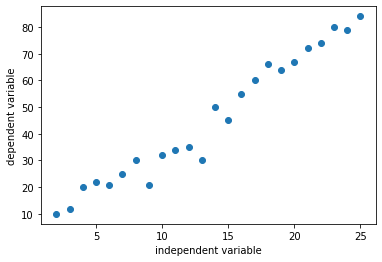

In [10]:
plt.scatter(xs, ys)
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.show()

Formula:

    Y = mx +b

    m = (mean(x) mean(y) – mean(xy)) / ( mean (x)^2 – mean( x^2))

    b = mean(y) – mean(x) * m


In [18]:
def slope_intercept(x_val, y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (np.mean(x)*np.mean(y) - np.mean(x*y)) / (np.mean(x)*np.mean(x) - np.mean(x*x))
    m = round(m, 2)
    b = np.mean(y) - np.mean(x)*m
    return m, b

In [20]:
slope_intercept(xs, ys)

(3.29, 0.9183333333333366)

In [21]:
m, b = slope_intercept(xs, ys)

In [22]:
reg_line = [(m*x) + b for x in xs]

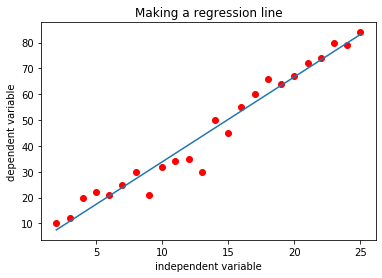

In [26]:
plt.scatter(xs, ys, color ='red')
plt.plot(xs, reg_line)
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.title('Making a regression line')
plt.show()

### Root mean square error RMSE

RMSE is the square root of (Yi – Y^i)**2

In [32]:
def rmse(y_a, y_p):
    y_actual = np.array(y_a)
    y_pred = np.array(y_p)
    error = (y_actual - y_pred)**2
    error_mean = round(np.mean(error))
    error_sq = np.sqrt(error_mean)
    return error_sq

In [33]:
rmse(ys, reg_line)

4.58257569495584

### Linear Regression on Boston housing dataset

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()

In [36]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [44]:
df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [46]:
df_x.shape, df_y.shape

((506, 13), (506, 1))

In [49]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
df_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Data preprocessing

In [54]:
df_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [55]:
df_y.isnull().sum()

0    0
dtype: int64

### Exploratory Data Analysis

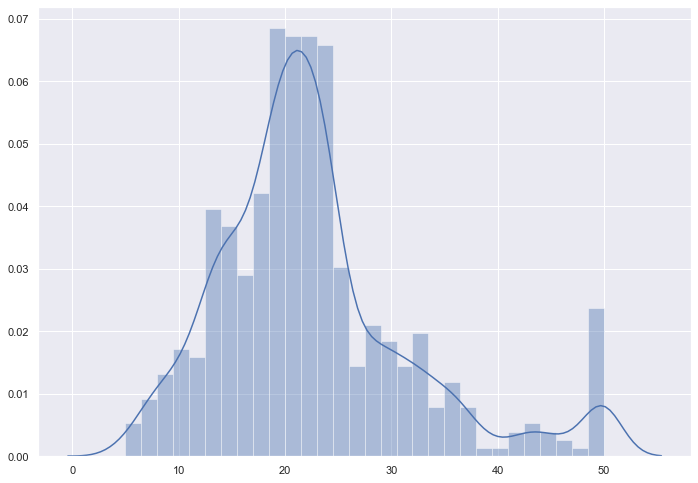

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_y, bins=30)
plt.show()

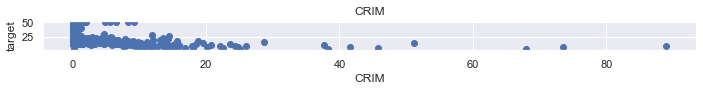

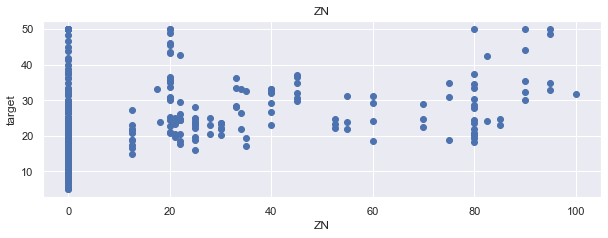

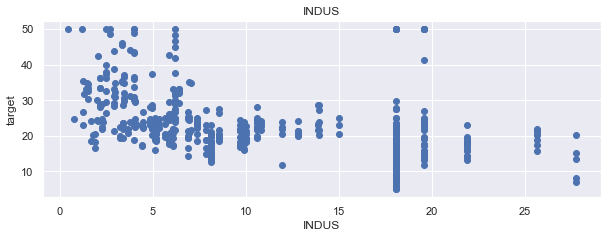

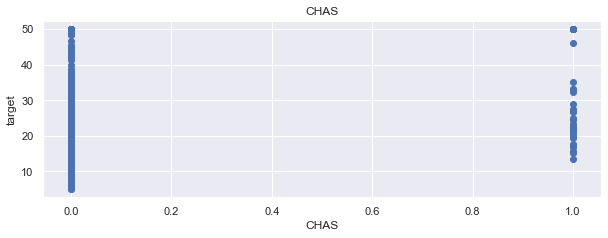

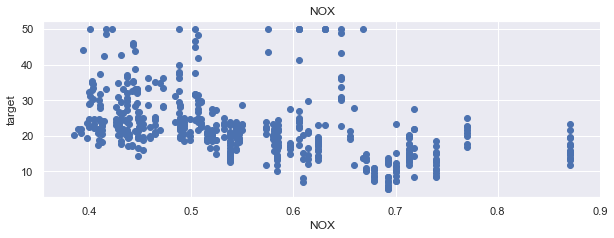

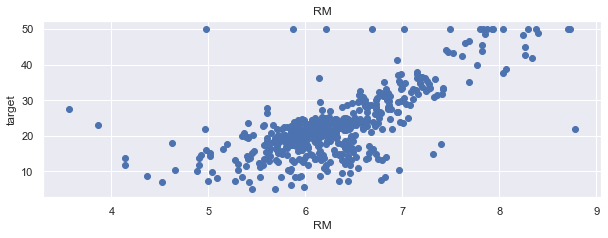

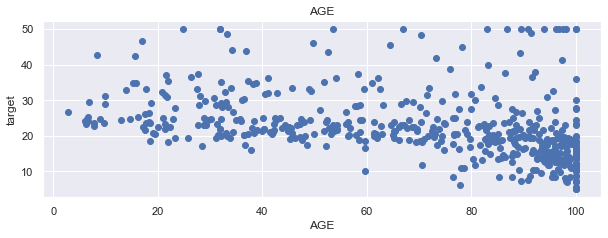

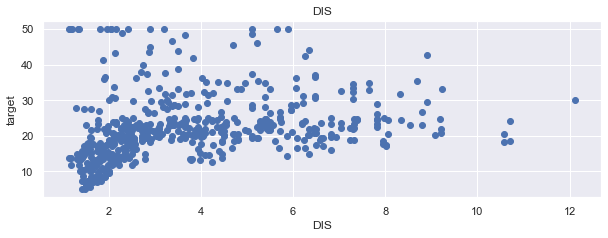

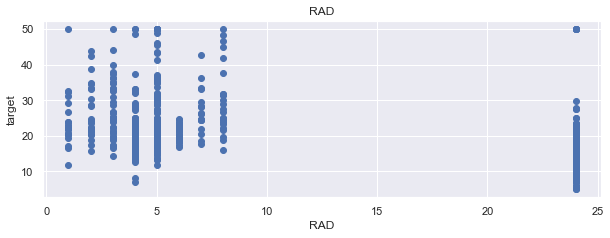

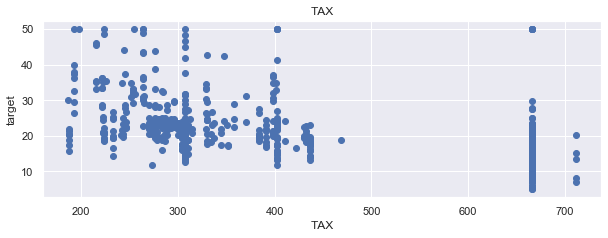

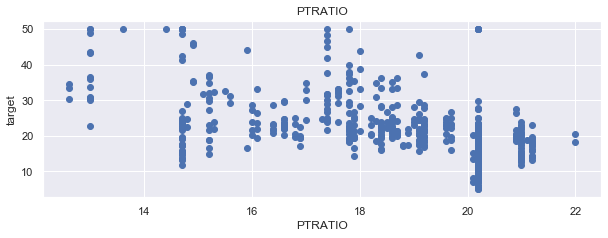

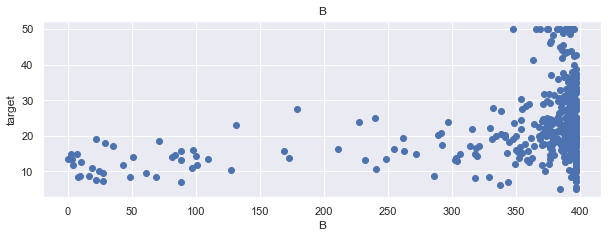

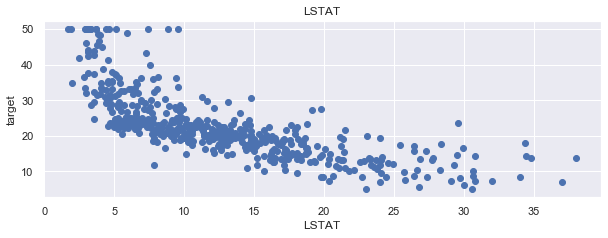

<Figure size 720x3600 with 0 Axes>

In [98]:
names = [i for i in df_x]
for i, col in enumerate(names):
    plt.subplot(len(names), 1, i+1)
    x = df_x[col]
    y = df_y
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')
    plt.figure(figsize=(10,50))

### Build Linear Model

#### Method 1: sklearn package

In [99]:
#import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [100]:
regr = linear_model.LinearRegression()

In [127]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [128]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [129]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
regr.intercept_

array([35.55487454])

In [133]:
y_pred = regr.predict(x_test)

In [134]:
regr.coef_[0]

array([-1.15966452e-01,  4.71249231e-02,  8.25980146e-03,  3.23404531e+00,
       -1.66865890e+01,  3.88410651e+00, -1.08974442e-02, -1.54129540e+00,
        2.93208309e-01, -1.34059383e-02, -9.06296429e-01,  8.80823439e-03,
       -4.57723846e-01])

In [135]:
print('Mean squared error: %.2f' %np.mean((y_pred - y_test) **2))

Mean squared error: 25.42


 Residual plot

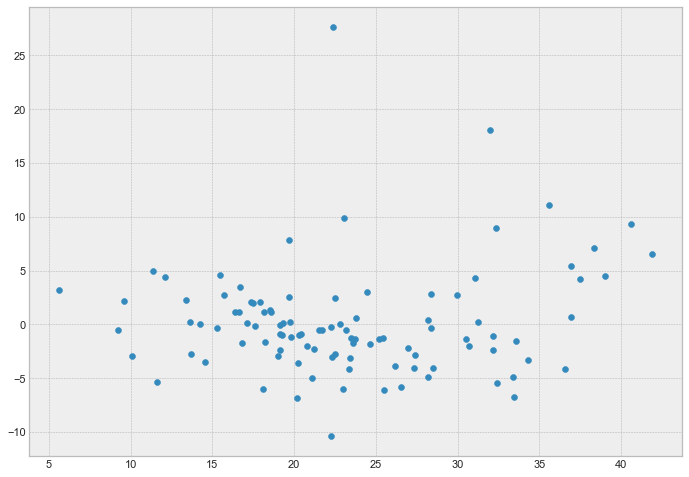

In [136]:
style.use('bmh')
plt.scatter(y_pred, y_test-y_pred)
plt.show()

#### Method2: statsmodels package

In [137]:
import statsmodels.api as sm

In [138]:
X = sm.add_constant(x_train)

In [141]:
model1 = sm.OLS(y_train, X)

In [142]:
result = model1.fit()

In [144]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.07
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          7.71e-106
Time:                        17:42:54   Log-Likelihood:                -1190.1
No. Observations:                 404   AIC:                             2408.
Df Residuals:                     390   BIC:                             2464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5549      5.499      6.466      0.000      24.743      46.366
CRIM          -0.1160      0.037     -3.130      0.002      -0.189      -0.043
ZN             0.0471      0.016      3.021      0.003       0.016       0.078
INDUS          0.0083      0.070      0.118      0.906      -0.129       0.145
CHAS           3.2340      1.011      3.199      0.001       1.247       5.221
NOX          -16.6866      4.146     -4.025      0.000     -24.837      -8.536
RM             3.8841      0.455      8.529      0.000       2.989       4.779
AGE           -0.0109      0.015     -0.739      0.460      -0.040       0.018
DIS           -1.5413      0.224     -6.875      0.000      -1.982      -1.101
RAD            0.2932      0.074      3.988      0.000       0.149       0.438
TAX           -0.0134      0.004     -3.173      0.002      -0.022      -0.005
PTRATIO       -0.9063      0.144     -6.292      0.000      -1.189      -0.623
B              0.0088      0.003      2.952      0.003       0.003       0.015
LSTAT         -0.4577      0.057     -8.096      0.000      -0.569      -0.347
==============================================================================
Omnibus:                      140.148   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.629
Skew:                           1.487   Prob(JB):                    2.74e-125
Kurtosis:                       8.023   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

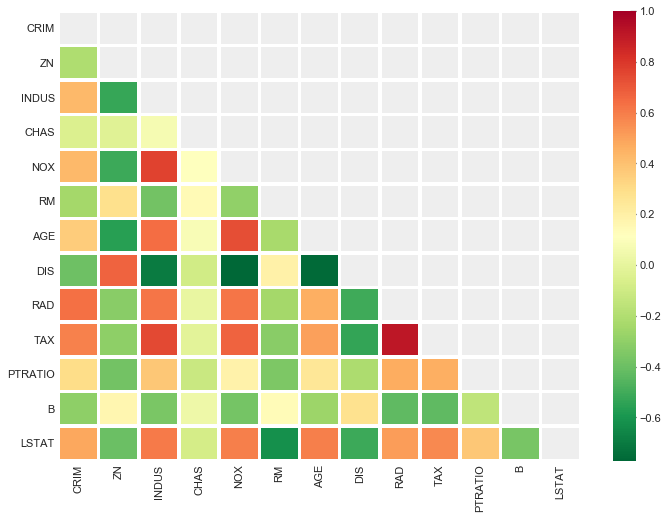

In [163]:
corr_df = x_train.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, mask=mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()